In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#get the sample submission
sample_submission=pd.read_csv('E:\\Downloads\\titanic_gender_submission.csv')

In [3]:
sample_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
#get train and test datasets
train=pd.read_csv('E:\\Downloads\\train_titanic.csv')
test=pd.read_csv('E:\\Downloads\\test_titanic.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.shape

(891, 12)

In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
test.shape

(418, 11)

In [12]:
train.columns.difference(test.columns)

Index(['Survived'], dtype='object')

In [ ]:
#Hypothesis
#1.Male would have survived more than female since they are physically strong
#2.Young people have more chances of survival than older people
#3.Pclass - Upper class have more chnaces of survival since they are rich
#4.

<AxesSubplot:>

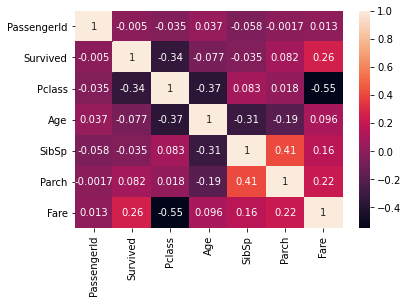

In [13]:
#EDA
corr_ = train.corr()
sns.heatmap(corr_,annot = True)
#There is a positive correlation between SiblingSpouse and ParentChild 
#There is a positive correlation between fare and survival
#Negative correlation between Pclass and survived
#Postive correlation between ParentChild and Fare
#Positive correlation between SiblingSpouse and Fare

<AxesSubplot:xlabel='Sex', ylabel='Age'>

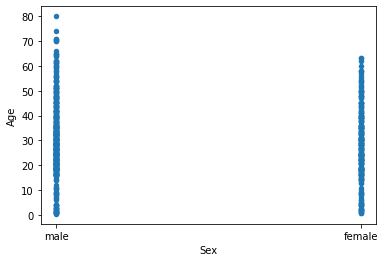

In [23]:
train.plot(kind='scatter',y='Age',x='Sex')
#There are many older men who travelled in Titanic

In [25]:
#add a column called 'Source' to both the datasets
train['source'] = 'train'
test['source'] = 'test'

In [26]:
train[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train


In [27]:
test[:3]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,test


In [28]:
#concatenate both train & test dataset into one
df = pd.concat([train,test])
df[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train


In [32]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
source            0
dtype: int64

In [33]:
df.shape

(1309, 13)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1309 non-null   float64
 8   Embarked     1309 non-null   object 
 9   source       1309 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 144.8+ KB


In [38]:
num_cols=df.select_dtypes(include=np.number).drop(columns=['PassengerId','Survived'])
cat_cols=df.select_dtypes(exclude=np.number).columns

In [35]:
num_cols

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
413,3,NaN,0,0,8.0500
414,1,39.0,0,0,108.9000
415,3,38.5,0,0,7.2500
416,3,NaN,0,0,8.0500


In [39]:
cat_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'source'], dtype='object')

In [40]:
#find the unique values in categorical columns
df[cat_cols].apply(lambda x : x.nunique())

Name        1307
Sex            2
Ticket       929
Cabin        186
Embarked       3
source         2
dtype: int64

In [41]:
df[cat_cols].apply(lambda x : print(x.value_counts()))

Kelly, Mr. James                      2
Connolly, Miss. Kate                  2
Jonkoff, Mr. Lalio                    1
Moore, Mr. Clarence Bloomfield        1
Thomas, Mr. Tannous                   1
                                     ..
Webber, Miss. Susan                   1
Goodwin, Master. William Frederick    1
McCaffry, Mr. Thomas Francis          1
Palsson, Miss. Stina Viola            1
Jacobsohn, Mr. Sidney Samuel          1
Name: Name, Length: 1307, dtype: int64
male      843
female    466
Name: Sex, dtype: int64
CA. 2343             11
CA 2144               8
1601                  8
347082                7
347077                7
                     ..
342826                1
SOTON/O.Q. 392087     1
330920                1
349216                1
237735                1
Name: Ticket, Length: 929, dtype: int64
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
B96 B98            4
F2                 4
                  ..
E12                1
C111              

Name        None
Sex         None
Ticket      None
Cabin       None
Embarked    None
source      None
dtype: object

In [43]:
#since name has high cardinality and we dont really need names we can drop the column
df.drop(columns='Name',inplace=True)

In [50]:
a = df['Ticket'].apply(lambda x : x[0:1])

In [51]:
a.value_counts()

3    429
2    278
1    210
P     98
S     98
C     77
A     42
W     19
7     13
F     13
4     11
6      9
L      5
5      3
8      2
9      2
Name: Ticket, dtype: int64

In [53]:
# we have tried to reduce cardinality of tickets but it doesn't really help towards our motive. so better to drop it.
df.drop(columns='Ticket',inplace=True)

In [56]:
df['Cabin'].isna().sum()*100/len(df)

77.46371275783041

In [57]:
#The column Cabin has more than 70% null values so we can drop it
df.drop(columns='Cabin',inplace=True)

In [58]:
df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             1
Embarked         2
source           0
dtype: int64

In [59]:
df['Age'].isna().sum()*100/len(df)

20.091673032849503

In [61]:
#Fill the null values of age column with the mean value
df['Age'] = df['Age'].transform(lambda x : x.fillna(x.mean()))

In [62]:
df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             1
Embarked         2
source           0
dtype: int64

In [70]:
#Fill the null values of embarked column with the mode value
df['Embarked'] = df['Embarked'].transform(lambda x : x.fillna(x.mode()[0]))
#Fill the null values of fare column with the mean value
df['Fare'] = df['Fare'].transform(lambda x : x.fillna(x.mean()))

In [71]:
df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
source           0
dtype: int64

In [72]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,12.883193,1.041658,0.865560,51.738879
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,29.881138,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [75]:
X = df.select_dtypes(include=np.number).drop(columns='Survived')
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data

,features
0,PassengerId
1,Pclass
2,Age
3,SibSp
4,Parch
5,Fare


In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data
#No column has VIF more than 10 so no need to drop any column

,features,VIF
0,PassengerId,3.630827
1,Pclass,4.579240
2,Age,4.461973
3,SibSp,1.493003
4,Parch,1.467395
5,Fare,1.829191


In [82]:
df_numbers = df.select_dtypes(include=np.number)
df_categories = df.select_dtypes(exclude = np.number).drop(columns = ['source'])
#encode the categorical columns
df_categories_encoded = pd.get_dummies(df_categories)
df_final = pd.concat([df_numbers,df_categories_encoded,df[['source']]],axis = 1)
df_final.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,source
0,1,0.0,3,22.0,1,0,7.2500,0,1,0,0,1,train
1,2,1.0,1,38.0,1,0,71.2833,1,0,1,0,0,train
2,3,1.0,3,26.0,0,0,7.9250,1,0,0,0,1,train
3,4,1.0,1,35.0,1,0,53.1000,1,0,0,0,1,train
4,5,0.0,3,35.0,0,0,8.0500,0,1,0,0,1,train


In [83]:
df_processed = df_final

In [84]:
#fetch train & test data
train_preprocessed = df_processed.loc[df_processed['source']=='train']
test_preprocessed = df_processed.loc[df_processed['source']=='test']

In [85]:
del train_preprocessed['source']
del test_preprocessed['source']

In [86]:
#exclude the columns shown in sample submission
X_train = train_preprocessed.drop(columns = ['PassengerId','Survived'])
X_test = test_preprocessed.drop(columns = ['PassengerId','Survived'])
# fetch the target prediction
train_y = train_preprocessed['Survived']
test_y = test_preprocessed['Survived']

In [87]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix

In [88]:
lr = LogisticRegression()
lr.fit(X_train,train_y)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

In [89]:
submission = pd.read_csv('E:\\Downloads\\titanic_gender_submission.csv')
submission['Loan_Status'] = pred_test
#export the submission as a csv file
sample_submission.to_csv("E:\\Downloads\\Submission_AswinRaam_Titanic.csv",index = False)